# 4章

## 2乗和誤差の計算

In [2]:
function mean_squared_error(output::Matrix, test::Matrix)
    return sum((output-t).^2)/2    
end

mean_squared_error (generic function with 1 method)

In [3]:
t=[0 0 1 0 0 0 0 0 0 0];
y=[0.1 0.05 0.6 0.0 0.05 0.1 0.0 0.1 0.0 0.0];
mean_squared_error(y,t)

0.09750000000000003

In [4]:
y=[0.1 0.05 0.1 0.0 0.05 0.1 0.0 0.6 0.5 0.0];
mean_squared_error(y, t)

0.7224999999999999

## 交差エントロピー誤差の計算

In [5]:
function cross_entropy_error(y::Matrix, t::Matrix)
    delta= 1e-7
    return -sum(t.*log.(y.+delta))
end

cross_entropy_error (generic function with 1 method)

In [6]:
t=[0 0 1 0 0 0 0 0 0 0];
y=[0.1 0.05 0.6 0.0 0.05 0.1 0.0 0.1 0.0 0.0];
cross_entropy_error(y,t)

0.510825457099338

In [7]:
y=[0.1 0.05 0.1 0.0 0.05 0.1 0.0 0.6 0.5 0.0];
cross_entropy_error(y,t)

2.302584092994546

## 訓練データの中から指定された個数のデータをランダムに選び出す

In [8]:
include("load_mnist.jl")
x_train, t_train, x_test, t_test = load_mnist(normalize=true ,flatten=true, one_hot_label=true)

([0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Matrix[[0 0 … 0 0]; [1 0 … 0 0]; … ; [0 0 … 0 0]; [0 0 … 1 0];;], [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Matrix[[0 0 … 0 0]; [0 0 … 0 0]; … ; [0 0 … 0 0]; [0 0 … 0 0];;])

In [8]:
println(size(x_train))
println(size(t_train))
println(size(x_test))
println(size(t_test))

(60000, 784)
(60000, 1)
(10000, 784)
(10000, 1)


In [9]:
t_train

60000×1 Matrix{Matrix}:
 [0 0 … 0 0]
 [1 0 … 0 0]
 [0 0 … 0 0]
 [0 1 … 0 0]
 [0 0 … 0 1]
 [0 0 … 0 0]
 [0 1 … 0 0]
 [0 0 … 0 0]
 [0 1 … 0 0]
 [0 0 … 0 0]
 [0 0 … 0 0]
 [0 0 … 0 0]
 [0 0 … 0 0]
 ⋮
 [0 0 … 0 0]
 [0 0 … 1 0]
 [0 0 … 0 1]
 [0 0 … 0 0]
 [0 0 … 0 1]
 [0 0 … 0 0]
 [0 1 … 0 0]
 [0 0 … 1 0]
 [0 0 … 0 0]
 [0 0 … 0 0]
 [0 0 … 0 0]
 [0 0 … 1 0]

In [9]:
using StatsBase

In [10]:
train_size=size(x_train, 1);
batch_size=10;
x_batch=sample(1:train_size, batch_size, replace=false);
t_batch=sample(1:train_size, batch_size, replace=false);

In [12]:
function cross_entropy_error(y::Matrix, t::Matrix)
    batch_size = size(y, 1)
    return -sum(t .* log.(y)) / batch_size
end

cross_entropy_error (generic function with 1 method)

## 数値微分

In [11]:
using ForwardDiff
using Plots

In [14]:
function function_1(x)
    return 0.01 * x^2 + 0.1 * x
end

function_1 (generic function with 1 method)

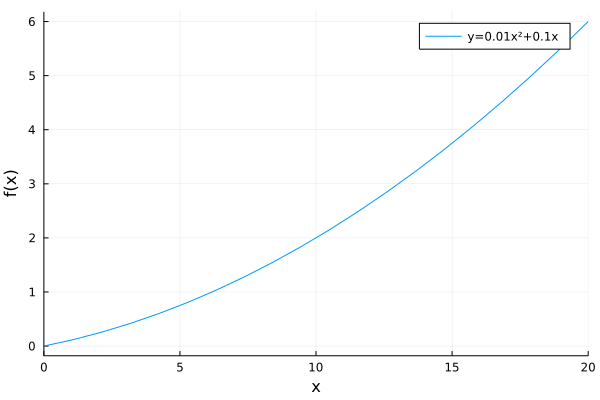

In [88]:
x=range(0,20, length= 20);
y=function_1.(x);
plot(
    x, y,
    xlims=(0,20),
    label="y=0.01x²+0.1x",
    xlabel="x",
    ylabel="f(x)"
)

In [89]:
println("x = 5: ", ForwardDiff.derivative(function_1, 5))
println("x = 10: ", ForwardDiff.derivative(function_1, 10))

x = 5: 0.2
x = 10: 0.30000000000000004


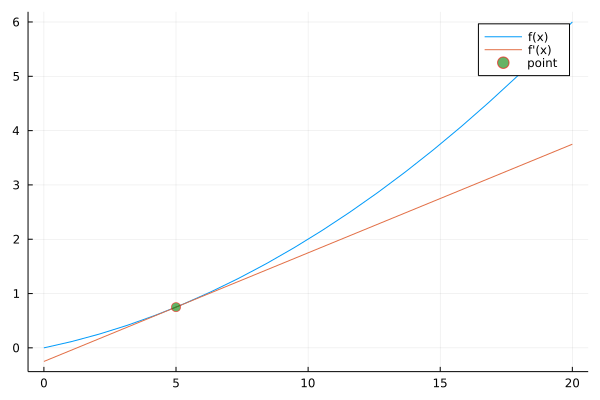

In [90]:
plot(
    x, [x -> function_1(x), x -> ForwardDiff.derivative(function_1, 5)*(x-5)+function_1(5)],
    label=["f(x)"  "f'(x)"]
);
scatter!(
    [5],[function_1(5)],
    label="point",
    markershape=:circle,
    markersize=5,
    markercolor=:green,
    markeralpha=0.6,
    markerstrokewidth=1,
    markerstrokecolor = :red,
    markerstrokestyle = :dot
)

In [97]:
function function_2(x::Vector)
    return x[1]^2+x[2]^2
end

function_2 (generic function with 1 method)

In [99]:
function_2([3,4])

25

In [101]:
ForwardDiff.gradient(function_2, [3,4])

2-element Vector{Int64}:
 6
 8

## 勾配法

In [114]:
function gradient_descent(f, init_x, lr=0.01, step_num=100)
    x = init_x
    for i in 1:step_num
        grad = ForwardDiff.gradient(f, x)
        x -= lr * grad
    end
    return x
end

gradient_descent (generic function with 3 methods)

In [116]:
init_x = [-3.0, 4.0];
gradient_descent(function_2, init_x, 0.1, 100)

2-element Vector{Float64}:
 -6.111107929003464e-10
  8.148143905337951e-10

In [168]:
function gradient_descent2(f, init_x, lr=0.01, step_num=100)
    x=Vector{Float64}[]
    push!(x,init_x)
    for i in 1:step_num
        grad = ForwardDiff.gradient(f, x[i])
        temp=x[i]-lr*grad
        push!(x,temp)
    end
    return x
end

gradient_descent2 (generic function with 3 methods)

In [169]:
init_x = [-3.0, 4.0];
res=gradient_descent2(function_2, init_x, 0.1, 100)

101-element Vector{Vector{Float64}}:
 [-3.0, 4.0]
 [-2.4, 3.2]
 [-1.92, 2.56]
 [-1.536, 2.048]
 [-1.2288000000000001, 1.6384]
 [-0.9830400000000001, 1.31072]
 [-0.7864320000000001, 1.0485760000000002]
 [-0.6291456000000001, 0.8388608000000002]
 [-0.5033164800000001, 0.6710886400000001]
 [-0.40265318400000005, 0.5368709120000001]
 [-0.32212254720000005, 0.4294967296000001]
 [-0.25769803776000005, 0.3435973836800001]
 [-0.20615843020800004, 0.27487790694400005]
 ⋮
 [-7.1142659627407135e-9, 9.485687950320948e-9]
 [-5.691412770192571e-9, 7.588550360256759e-9]
 [-4.553130216154057e-9, 6.070840288205408e-9]
 [-3.6425041729232455e-9, 4.856672230564326e-9]
 [-2.9140033383385962e-9, 3.885337784451461e-9]
 [-2.331202670670877e-9, 3.108270227561169e-9]
 [-1.8649621365367016e-9, 2.4866161820489353e-9]
 [-1.4919697092293612e-9, 1.989292945639148e-9]
 [-1.193575767383489e-9, 1.5914343565113183e-9]
 [-9.548606139067912e-10, 1.2731474852090548e-9]
 [-7.638884911254329e-10, 1.0185179881672439e-9]
 [-6.

In [178]:
res_reshape=reduce(vcat, res')

101×2 Matrix{Float64}:
 -3.0          4.0
 -2.4          3.2
 -1.92         2.56
 -1.536        2.048
 -1.2288       1.6384
 -0.98304      1.31072
 -0.786432     1.04858
 -0.629146     0.838861
 -0.503316     0.671089
 -0.402653     0.536871
 -0.322123     0.429497
 -0.257698     0.343597
 -0.206158     0.274878
  ⋮            
 -7.11427e-9   9.48569e-9
 -5.69141e-9   7.58855e-9
 -4.55313e-9   6.07084e-9
 -3.6425e-9    4.85667e-9
 -2.914e-9     3.88534e-9
 -2.3312e-9    3.10827e-9
 -1.86496e-9   2.48662e-9
 -1.49197e-9   1.98929e-9
 -1.19358e-9   1.59143e-9
 -9.54861e-10  1.27315e-9
 -7.63888e-10  1.01852e-9
 -6.11111e-10  8.14814e-10

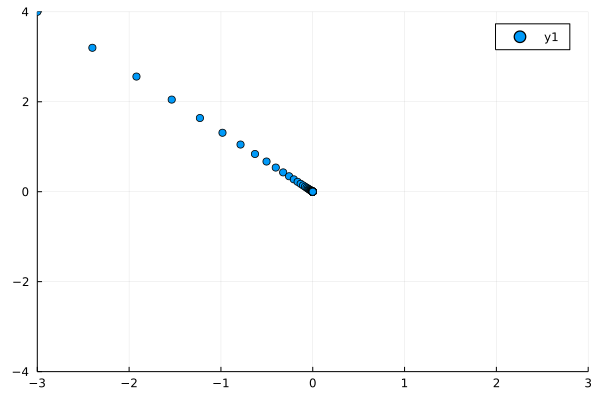

In [187]:
scatter(
    res_reshape[:,1], res_reshape[:, 2],
    xlims=(-3,3),
    ylims=(-4,4)
    )

## ニューラルネットワークに対する勾配

In [200]:
function soft_max_function(x::Matrix)
    c=maximum(x)
    return exp.(x.-c)/sum(exp.(x.-c))
end

soft_max_function (generic function with 1 method)

In [209]:
function cross_entropy_error(y::Matrix, t::Matrix)
    delta= 1e-7
    return -sum(t.*log.(y.+delta))
end

cross_entropy_error (generic function with 1 method)

In [201]:
W=[0.47355232 0.9977393 0.84668094
0.85557411 0.03563661 0.69422093]

2×3 Matrix{Float64}:
 0.473552  0.997739   0.846681
 0.855574  0.0356366  0.694221

In [202]:
x=[0.6 0.9]

1×2 Matrix{Float64}:
 0.6  0.9

In [205]:
predict=x*W

1×3 Matrix{Float64}:
 1.05415  0.630717  1.13281

In [206]:
argmax(vec(predict))-1

2

In [211]:
z=predict;
y=soft_max_function(z);
t=[0 0 1]
loss=cross_entropy_error(y,t)

0.9280682857864075

In [218]:
function init_weight()
    return randn(Float64, 2,3)
end

init_weight (generic function with 1 method)

In [221]:
function prediction(x)
    return x*init_weight()
end

prediction (generic function with 1 method)

In [231]:
function loss_func(x, t)
    z=prediction(x)
    y=soft_max_function(z)
    loss=cross_entropy_error(y, t)
    return loss
end

loss_func (generic function with 1 method)

In [237]:
W=init_weight()

2×3 Matrix{Float64}:
 -1.19962  -0.224483  -0.0904918
  1.43805  -0.524585   0.546358

In [238]:
x=[0.6 0.9]
prediction(x)

1×3 Matrix{Float64}:
 1.21587  -1.98923  -0.892827

In [239]:
t=[0 0 1]
loss_func(x, t)

0.3135478687666907

In [240]:
f(W)=loss_func(x,t)

f (generic function with 2 methods)

In [241]:
ForwardDiff.gradient(f, W)

2×3 Matrix{Float64}:
 0.0  0.0  0.0
 0.0  0.0  0.0

In [279]:
mutable struct Dense
    W::Matrix{Float64}
    set_weight::Function
    forward::Function
    function Dense(in_dim::Int, out_dim::Int)
        self = new()
        self.W = randn(out_dim, in_dim)
        self.set_weight = (W -> (self.W = W))
        self.forward = (x -> self.W * x)
        return self
    end
end

In [280]:
dense=Dense(5, 3)
x=randn(5)
y=dense.forward(x)

3-element Vector{Float64}:
 -1.690525132002757
  3.3822566648057086
 -0.4382789534683381

In [1]:
mutable struct Dense
    W::Matrix
    Dense(in_dim, out_dim)=new(randn(out_dim, in_dim))
end

In [ ]:
function set_weight!(m::Dense, W)
    m.W=W
end

In [ ]:
mutable struct simpleNet
    W::Matrix
end